1.

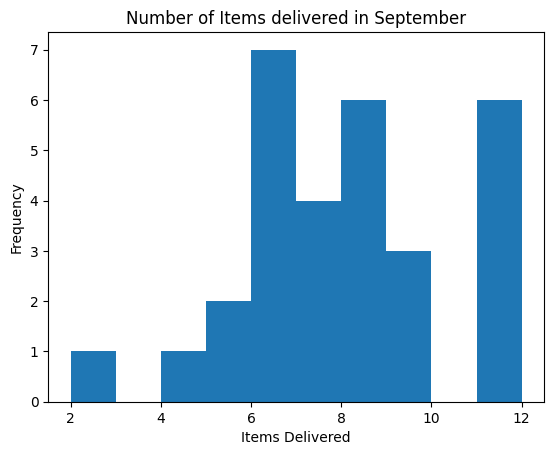

In [81]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.pyplot import subplots 
import warnings
warnings.filterwarnings('ignore')

mail = [6, 7, 6, 7, 7, 6, 11, 4, 8, 6, 6, 12, 2, 8, 12, 5, 7, 8, 6, 11, 6, 8, 9, 11, 5, 9, 8, 9, 8, 12]

plt.hist(mail)
plt.title("Number of Items delivered in September")
plt.xlabel("Items Delivered")
plt.ylabel("Frequency")
plt.show()

[(1.999, 6.0], (6.0, 8.0], (1.999, 6.0], (6.0, 8.0], (6.0, 8.0], ..., (8.0, 12.0], (6.0, 8.0], (8.0, 12.0], (6.0, 8.0], (8.0, 12.0]]
Length: 30
Categories (3, interval[float64, right]): [(1.999, 6.0] < (6.0, 8.0] < (8.0, 12.0]]


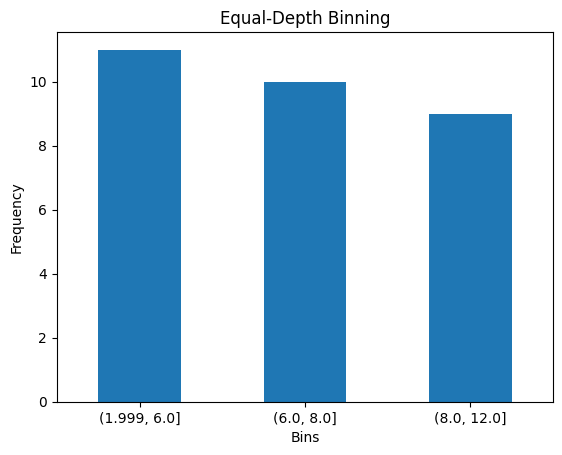

In [82]:
# (a)
mail_depth = pd.qcut(mail, 3)
print(mail_depth)
bin_counts = pd.value_counts(mail_depth).sort_index()
bin_counts.plot(kind="bar", rot=0)
plt.xlabel("Bins")
plt.ylabel("Frequency")
plt.title("Equal-Depth Binning")
plt.show()

[(5.333, 8.667], (5.333, 8.667], (5.333, 8.667], (5.333, 8.667], (5.333, 8.667], ..., (8.667, 12.0], (5.333, 8.667], (8.667, 12.0], (5.333, 8.667], (8.667, 12.0]]
Length: 30
Categories (3, interval[float64, right]): [(1.99, 5.333] < (5.333, 8.667] < (8.667, 12.0]]


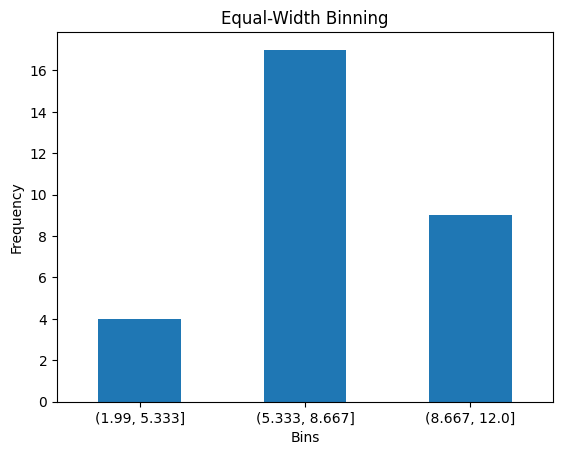

In [83]:
# (b)
mail_width = pd.cut(mail, 3)
print(mail_width)
bin_counts = pd.value_counts(mail_width).sort_index()
bin_counts.plot(kind="bar", rot=0)
plt.xlabel("Bins")
plt.ylabel("Frequency")
plt.title("Equal-Width Binning")
plt.show()

(c) The equal width binning works better on this data because it maintians the distribution.

In [84]:
# (d) min-max normalization = (value - min)/ (max - min)
max = 12
min = 2
value = 5
normalized_5 = (value - min)/ (max - min)
print(normalized_5)

0.3


The min-max transformed value for 5 is 0.3

In [85]:
# (e) z-score normalization = (value - mean) / SD
mail_series = pd.Series(mail)
mean = mail_series.mean()
sd = mail_series.std()
value = 5
normalized_5 = (value - mean)/ sd
print(normalized_5)

-1.0804145489043901


The z-score transformed value of 5 is -1.08

(f) The z-score normalization method is better for this data because it generally follows the normal distribution.

2.

In [3]:
from ISLP import load_data
from ISLP.models import summarize
import numpy as np
import statsmodels.api as sm
Bikeshare = load_data('Bikeshare')
Bikeshare

,season,mnth,day,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,bikers
0,1,Jan,1,0,0,6,0,clear,0.24,0.2879,0.81,0.0000,3,13,16
1,1,Jan,1,1,0,6,0,clear,0.22,0.2727,0.80,0.0000,8,32,40
2,1,Jan,1,2,0,6,0,clear,0.22,0.2727,0.80,0.0000,5,27,32
3,1,Jan,1,3,0,6,0,clear,0.24,0.2879,0.75,0.0000,3,10,13
4,1,Jan,1,4,0,6,0,clear,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8640,1,Dec,365,19,0,6,0,clear,0.42,0.4242,0.54,0.2239,19,73,92
8641,1,Dec,365,20,0,6,0,clear,0.42,0.4242,0.54,0.2239,8,63,71
8642,1,Dec,365,21,0,6,0,clear,0.40,0.4091,0.58,0.1940,2,50,52
8643,1,Dec,365,22,0,6,0,clear,0.38,0.3939,0.62,0.1343,2,36,38


In [87]:
# Identify some predictors and the target

X = Bikeshare[['temp']]
y = Bikeshare['bikers']

In [88]:
X['intercept'] = np.ones(Bikeshare.shape[0])
X

,temp,intercept
0,0.24,1.0
1,0.22,1.0
2,0.22,1.0
3,0.24,1.0
4,0.24,1.0
...,...,...
8640,0.42,1.0
8641,0.42,1.0
8642,0.40,1.0
8643,0.38,1.0


In [89]:
# (a)
model_temp = sm.OLS(y, X[['intercept','temp']])
results_temp = model_temp.fit()
summarize(results_temp)


,coef,std err,t,P>|t|
intercept,-5.3745,3.423,-1.570,0.116
temp,305.0060,6.488,47.008,0.000


(b) The temperature variable has a small p-value.

In [90]:
print('R^2:', results_temp.rsquared)

R^2: 0.20361080146793897


(c) An R^2 value of 0.2 indicates a weak relationship between the predictor and response.

(d) The relationship between the predictor and the response is positive because the coefficient for the slope is 305 which is positive.

(e) The model predicts -5.37 or bikers at the minimum temperature.

(f) It would be inappropriate to use this model to estimate on this day because it is impossible to have negative bike rentals.

In [91]:
def abline(ax, b, m, *args, **kwargs):
    "Add a line with slope m and intercept b to ax"
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim, ylim, *args, **kwargs)

In [92]:
# Create helper functions for computing the mean squared error

def predict(X, model):
    # the built-in get_prediction tool returns an array, so we need to convert to a dataframe
    predictions_df = pd.DataFrame(model.get_prediction(X).predicted, columns=['y_hat'], index=X.index)
    return predictions_df['y_hat']

def mse(y, y_hat):
    # calculate the residual error for each individual record
    resid = y - y_hat
    # square the residual (hence "squared error")
    sq_resid = resid**2
    # calculate the sum of squared errors
    SSR = sum(sq_resid)
    # divide by the number of records to get the mean squared error
    MSE = SSR / y.shape[0]
    return MSE

In [93]:
# Compute the MSE on the training set

predictions_temp = predict(X[['intercept', 'temp']], results_temp)
print('mse train:',mse(y, predictions_temp))

mse train: 14255.203390114018


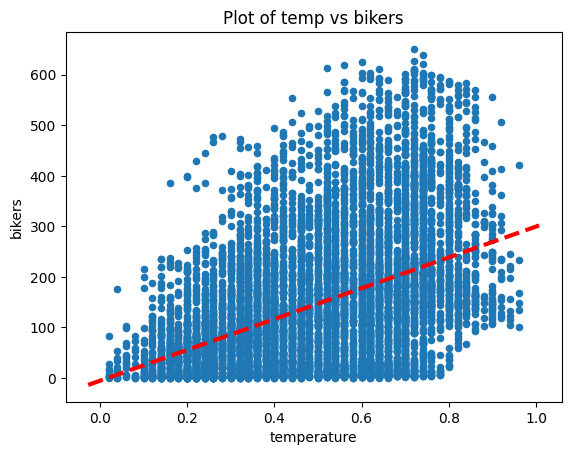

In [94]:
# (g)
ax = Bikeshare.plot.scatter('temp', 'bikers')
ax.set_xlabel("temperature")
ax.set_title("Plot of temp vs bikers")
abline(ax, 
       results_temp.params['intercept'], 
       results_temp.params['temp'], 
       'r--', 
       linewidth=3)

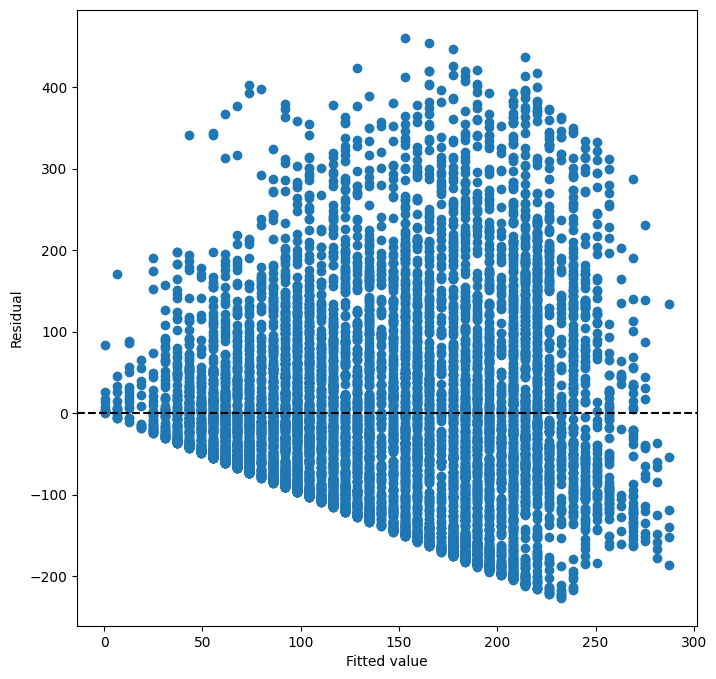

In [95]:
# (h)

ax = subplots(figsize=(8,8))[1]
ax.scatter(predictions_temp, y - predictions_temp)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');

3.

In [96]:
# (a)
Bikeshare['hr'] = Bikeshare['hr'].astype(int)
Bikeshare.corr(numeric_only=True)

,season,day,hr,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,bikers
season,1.000000,0.825218,-0.012179,-0.001116,-0.013639,0.013763,0.343535,0.351910,0.191793,-0.154735,0.141894,0.220666,0.221719
day,0.825218,1.000000,-0.011560,0.030972,0.010990,0.003277,0.261316,0.273091,0.189453,-0.154169,0.090982,0.185044,0.177797
hr,-0.012179,-0.011560,1.000000,-0.000929,-0.005618,0.003792,0.120548,0.116382,-0.251188,0.125153,0.303720,0.390313,0.407486
holiday,-0.001116,0.030972,-0.000929,1.000000,-0.076324,-0.247934,-0.020059,-0.026915,-0.022895,0.000502,0.052906,-0.046779,-0.022912
weekday,-0.013639,0.010990,-0.005618,-0.076324,1.000000,0.018572,-0.038969,-0.042439,-0.051307,0.039586,-0.013475,-0.000500,-0.004321
workingday,0.013763,0.003277,0.003792,-0.247934,0.018572,1.000000,0.053405,0.052551,0.025305,0.010509,-0.324750,0.129540,0.011704
temp,0.343535,0.261316,0.120548,-0.020059,-0.038969,0.053405,1.000000,0.992022,-0.039525,-0.005989,0.478931,0.381614,0.451233
atemp,0.351910,0.273091,0.116382,-0.026915,-0.042439,0.052551,0.992022,1.000000,-0.023541,-0.046120,0.473859,0.378275,0.447029
hum,0.191793,0.189453,-0.251188,-0.022895,-0.051307,0.025305,-0.039525,-0.023541,1.000000,-0.263196,-0.307096,-0.243815,-0.288615
windspeed,-0.154735,-0.154169,0.125153,0.000502,0.039586,0.010509,-0.005989,-0.046120,-0.263196,1.000000,0.066113,0.080874,0.085356


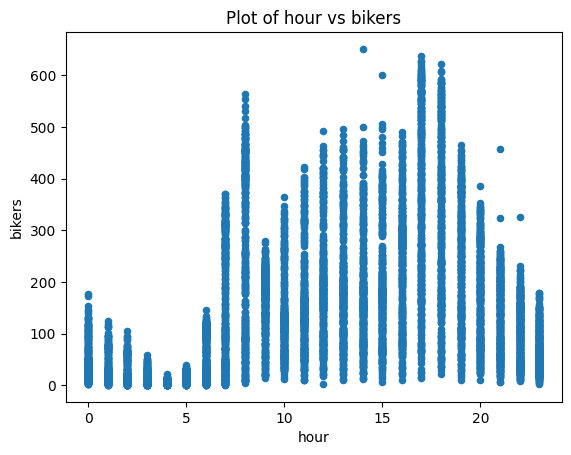

In [97]:
# (b)
ax = Bikeshare.plot.scatter('hr', 'bikers')
ax.set_xlabel('hour')
ax.set_title("Plot of hour vs bikers")
ax.plot();

In [98]:
# Identify some predictors and the target

X['hr'] = Bikeshare['hr']
X

,temp,intercept,hr
0,0.24,1.0,0
1,0.22,1.0,1
2,0.22,1.0,2
3,0.24,1.0,3
4,0.24,1.0,4
...,...,...,...
8640,0.42,1.0,19
8641,0.42,1.0,20
8642,0.40,1.0,21
8643,0.38,1.0,22


In [99]:
# (c)
model_hr = sm.OLS(y, X[['intercept', 'hr']])
results_hr = model_hr.fit()
summarize(results_hr)

,coef,std err,t,P>|t|
intercept,52.4482,2.564,20.453,0.0
hr,7.8926,0.190,41.483,0.0


In [100]:
# Compute the MSE on the training set

predictions_hr = predict(X[['intercept', 'hr']], results_hr)
print('mse train:',mse(y, predictions_hr))

mse train: 14927.62230797846


In [101]:
# (d)
X['hr^2'] = Bikeshare['hr'] ** 2


In [102]:
model = sm.OLS(y, X[['intercept', 'hr', 'hr^2']])
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,-46.4378,3.336,-13.918,0.0
hr,34.7187,0.668,51.980,0.0
hr^2,-1.1647,0.028,-41.594,0.0


In [103]:
predictions = predict(X[['intercept', 'hr', 'hr^2']], results)
print('mse train:',mse(y, predictions))

mse train: 12437.720822189807


In [104]:
# (e)
X['workingday'] = Bikeshare['workingday']
X['hr*workingday'] = X['hr'] * X['workingday']
X

,temp,intercept,hr,hr^2,workingday,hr*workingday
0,0.24,1.0,0,0,0,0
1,0.22,1.0,1,1,0,0
2,0.22,1.0,2,4,0,0
3,0.24,1.0,3,9,0,0
4,0.24,1.0,4,16,0,0
...,...,...,...,...,...,...
8640,0.42,1.0,19,361,0,0
8641,0.42,1.0,20,400,0,0
8642,0.40,1.0,21,441,0,0
8643,0.38,1.0,22,484,0,0


In [105]:
model1 = sm.OLS(y, X[['intercept', 'hr', 'hr^2', 'workingday', 'hr*workingday']])
results = model1.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,-41.9017,4.777,-8.771,0.000
hr,34.1591,0.714,47.835,0.000
hr^2,-1.1649,0.028,-41.610,0.000
workingday,-6.6632,5.025,-1.326,0.185
hr*workingday,0.8237,0.373,2.206,0.027


In [106]:
predictions = predict(X[['intercept', 'hr', 'hr^2', 'workingday', 'hr*workingday']], results)
print('mse train:',mse(y, predictions))

mse train: 12428.95706672807


In [107]:
# (f)
model2 = sm.OLS(y, X[['intercept', 'hr', 'hr^2', 'workingday', 'hr*workingday', 'temp']])
results = model2.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,-139.8046,4.793,-29.170,0.000
hr,30.3688,0.646,46.994,0.000
hr^2,-1.0420,0.025,-41.234,0.000
workingday,-13.8377,4.513,-3.066,0.002
hr*workingday,0.9535,0.335,2.846,0.004
temp,252.1313,5.518,45.696,0.000


In [108]:
predictions = predict(X[['intercept', 'hr', 'hr^2', 'workingday', 'hr*workingday', 'temp']], results)
print('mse train:',mse(y, predictions))

mse train: 10009.578912400699


(g) The MSE for the model on the training data should improve when including more predictors from the dataset.

(h) The last model should perform the best since it had the lowest MSE on the training data.